Saving 10. Market Basket Analysis.csv to 10. Market Basket Analysis (9).csv
Dataset Preview:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

One-hot Encoded Basket Format:
        level_1                                                          \
0             1      2      3      4      5      6      7      8      9   
level_0                                                                   
0          True  False  False  False  False  False  False  False  False   
1         False   True  False  False  False  False  False  False  False   
2         False  False   True  False  False  False  False  False  False   
3         False  False  False   True  False  False  False  False  False   
4         False  False  False  False   True  False  False  False  False   

                ...               

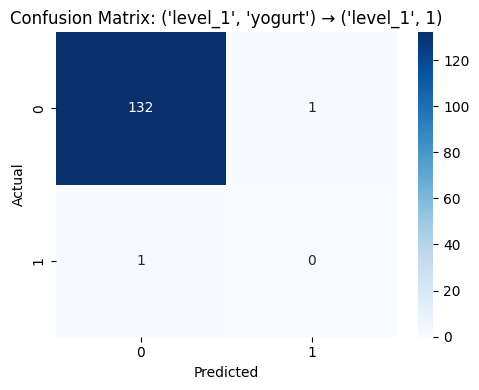

In [14]:
# ========================================
# Market Basket Analysis - Google Colab Code (Extended with Confusion Matrix)
# ========================================

# Step 1: Install required libraries
!pip install mlxtend --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from google.colab import files

# Step 2: Upload CSV from your computer
uploaded = files.upload()

# Step 3: Load the dataset
df = pd.read_csv("10. Market Basket Analysis.csv")

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Step 4: Preprocessing
# Convert to one-hot encoded basket format
basket = df.stack().reset_index().pivot_table(index='level_0',
                                              columns=0,
                                              aggfunc=lambda x: 1, fill_value=0)

basket.columns.name = None
basket = basket.astype(bool)  # Convert to boolean to avoid warning

print("\nOne-hot Encoded Basket Format:")
print(basket.head())

# Step 5: Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Check if any frequent itemsets were found
if not frequent_itemsets.empty:
    # Visualize the support of top frequent itemsets
    plt.figure(figsize=(10,5))
    top_items = frequent_itemsets.sort_values('support', ascending=False).head(10)
    top_items['itemsets'] = top_items['itemsets'].apply(lambda x: ', '.join(list(x)))
    top_items.plot(x='itemsets', y='support', kind='bar', legend=False)

    plt.title('Top 10 Frequent Itemsets by Support')
    plt.xlabel('Itemsets')
    plt.ylabel('Support')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Step 6: Generate Association Rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    rules = rules.sort_values(by='confidence', ascending=False)

    print("\nTop Association Rules:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
else:
    print("\n⚠️ No frequent itemsets found with the current min_support threshold.")
    print("❌ Association rules cannot be generated.")

# Step 7: Always Generate Confusion Matrix
print("\nGenerating Confusion Matrix...")

if 'milk' in basket.columns and 'bread' in basket.columns:
    item1, item2 = 'milk', 'bread'
    print("✅ Using 'milk' → 'bread' for prediction")
else:
    print("⚠️ 'milk' and/or 'bread' not found. Choosing top 2 items instead.")
    item_counts = basket.sum().sort_values(ascending=False)
    item1, item2 = item_counts.index[0], item_counts.index[1]
    print(f"✅ Using '{item1}' → '{item2}' for prediction")

# Simulate prediction
y_true = basket[item2]
y_pred = basket[item1]  # naive prediction: if item1 is bought, predict item2

# Calculate metrics
cm = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"\nEvaluation Metrics for '{item1}' → '{item2}' prediction:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: {item1} → {item2}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
